# Final Project "Klasifikasi untuk Memprediksi Status Kesehatan Mental"

Indri Yanti

Note: Dataset Heart Diseases tidak ada jadi diganti ini
Outline Proyek:
1. Pengenalan
2. Import Pustaka yang Dibutuhkan
3. Data Loading & Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Pendefinisian Model
6. Pelatihan Model
7. Evaluasi Model
8. Model Inference
9. Kesimpulan

* Latar Belakang:
Kesehatan mental adalah aspek penting dari kesehatan keseluruhan seseorang. 

* Data yang Digunakan:

* Sumber data: Kaggle Mental Health Detection Dataset
* Deskripsi data: Dataset ini terdiri dari informasi kesehatan mental individu, termasuk usia, jenis kelamin, pekerjaan, dan beberapa fitur lainnya.
* Jumlah data: Periksa jumlah entri dalam data pelatihan.
* Jumlah kelas: Kategori kesehatan mental.
* Objective:
Membangun model klasifikasi untuk memprediksi status kesehatan mental berdasarkan fitur-fitur yang tersedia dalam dataset.

## Import Library

In [56]:
# Import semua pustaka yang dibutuhkan dalam satu cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data Loading and Exploratory Data Analysis (EDA)

In [42]:
# Load dataset
df_ori = pd.read_csv('Deepression.csv')
df = df_ori

# Menampilkan informasi dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [43]:
print(df.describe())

          Number        Sleep    Appetite    Interest     Fatigue  \
count  813.000000  540.000000  540.000000  540.000000  540.000000   
mean   407.000000    2.912963    2.777778    2.785185    2.964815   
std    234.837178    1.738417    1.675610    1.680998    1.727402   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%    204.000000    1.000000    1.000000    1.000000    1.000000   
50%    407.000000    2.000000    2.000000    2.000000    2.000000   
75%    610.000000    5.000000    5.000000    5.000000    5.000000   
max    813.000000    6.000000    5.000000    5.000000    6.000000   

       Worthlessness  Concentration   Agitation  Suicidal Ideation  \
count     540.000000     540.000000  540.000000         540.000000   
mean        2.957407       2.777778    2.968519           2.964815   
std         1.740077       1.673394    1.719939           1.733834   
min         1.000000       1.000000    1.000000           1.000000   
25%         1.000000       1

In [44]:
print(df.head())

   Number   Sleep  Appetite  Interest  Fatigue  Worthlessness  Concentration  \
0        1    1.0       1.0       1.0      5.0            5.0            1.0   
1        2    2.0       5.0       5.0      1.0            1.0            5.0   
2        3    5.0       2.0       2.0      2.0            2.0            2.0   
3        4    1.0       1.0       1.0      5.0            5.0            1.0   
4        5    2.0       5.0       5.0      1.0            1.0            5.0   

   Agitation  Suicidal Ideation  Sleep Disturbance  Aggression  Panic Attacks  \
0        5.0                5.0                1.0         5.0            5.0   
1        1.0                1.0                5.0         1.0            1.0   
2        2.0                2.0                2.0         2.0            2.0   
3        5.0                5.0                1.0         5.0            5.0   
4        1.0                1.0                5.0         1.0            1.0   

   Hopelessness  Restlessness  L

In [45]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

In [46]:
# Checking datset-3
df.duplicated().sum()   # cek ada yang duplicate tidak datanya

0

In [47]:
# Menghilangkan duplicate
df.drop_duplicates(inplace=True) # cara 1
#df = df.drop_duplicates()  # cara 2, ini kalau di overwrite

In [48]:
# Setelah didrop duplicatenya maka jadi 0
df.duplicated().sum()

0

In [49]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

c:\Users\Lenovo\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


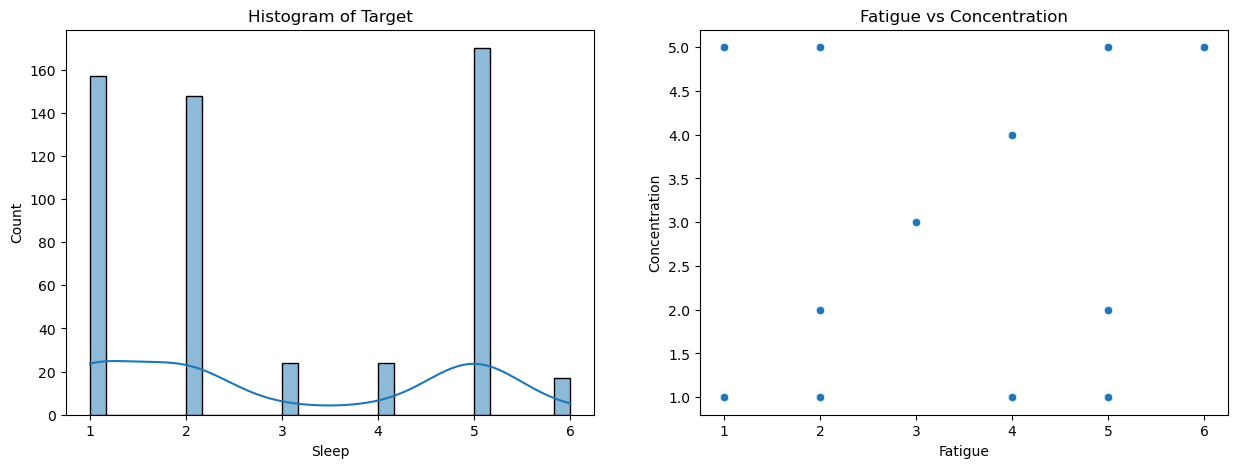

In [50]:
# Create Histogram and Scatter Plot

# Create canvas
plt.figure(figsize=(15,5))

# Plot 1st visualization
plt.subplot(1,2,1)
sns.histplot(df.Sleep,kde=True,bins=30)
plt.title('Histogram of Target')

#Plot 2nd visualization
plt.subplot(1,2,2)
sns.scatterplot(x='Fatigue', y='Concentration', data=df)
plt.title('Fatigue vs Concentration')

plt.show()

In [51]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

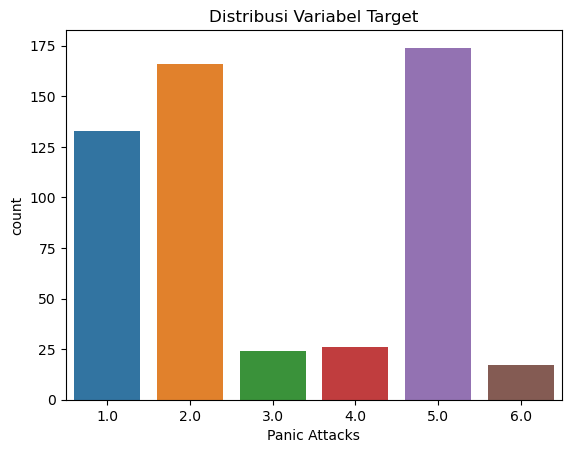

In [52]:
# Visualisasi distribusi variabel target
sns.countplot(x='Panic Attacks', data=df)
plt.title('Distribusi Variabel Target')
plt.show()

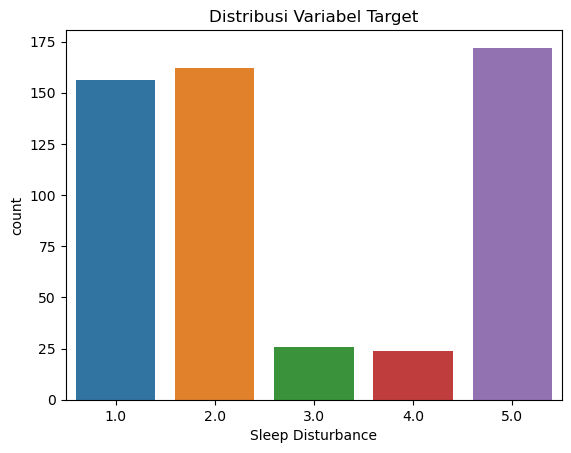

In [53]:
# Visualisasi distribusi variabel target
sns.countplot(x= 'Sleep Disturbance', data=df)
plt.title('Distribusi Variabel Target')
plt.show()

In [ ]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

## Feature Engingeering

c:\Users\Lenovo\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


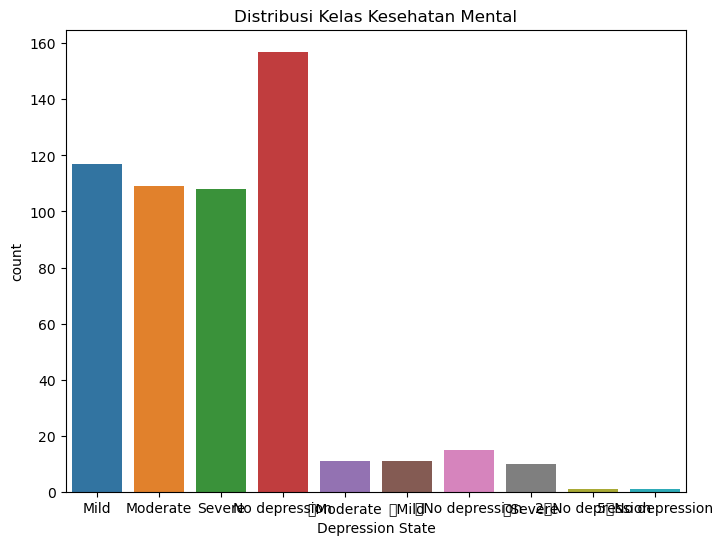

In [60]:
# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Depression State')
plt.title('Distribusi Kelas Kesehatan Mental')
plt.show()

# Visualisasi fitur lainnya (misalnya usia, jenis kelamin) jika ada
if 'Age' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Age'].dropna(), bins=30)
    plt.title('Distribusi Usia')
    plt.show()

if 'Gender' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Gender')
    plt.title('Distribusi Jenis Kelamin')
    plt.show()

# Mengisi nilai kosong jika ada
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

if 'Gender' in df.columns:
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Membuat fitur baru (jika diperlukan)
# Contoh: Mengelompokkan usia ke dalam kategori jika ada kolom 'Age'
if 'Age' in df.columns:
    bins = [0, 18, 35, 60, 100]
    labels = ['Child', 'Youth', 'Adult', 'Senior']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

    # Cek apakah kolom 'AgeGroup' telah dibuat dengan benar
    print(df['AgeGroup'].value_counts())

    # Visualisasi tambahan
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='AgeGroup')
    plt.title('Distribusi Kelompok Usia')
    plt.show()


## Data Preprocessing

In [68]:
# Menangani Missing Value
# Memeriksa missing values
print(df.isnull().sum())

# Mengisi missing values pada kolom 'Age' dengan median
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

# Mengisi missing values pada kolom 'Gender' dengan mode
if 'Gender' in df.columns:
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Mengisi missing values pada kolom lainnya jika ada
# Misalnya dengan mean atau strategi lain yang sesuai
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

# Konfirmasi kembali tidak ada missing values
print(df.isnull().sum())


Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64
Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64


In [69]:
# Encode categorical variables jika ada
if 'Gender' in df.columns:
    df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

if 'AgeGroup' in df.columns:
    df['AgeGroup'] = LabelEncoder().fit_transform(df['AgeGroup'])

# Select features and target
features = [col for col in df.columns if col not in ['Depression State', 'Number ']]
X = df[features]
y = df['Depression State']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Pendefinisian Model

In [71]:
# Definisikan model RandomForest
rf_model = RandomForestClassifier(random_state=42)

## Tuning Model

In [72]:
# Tuning model dengan GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


## Pelatihan Model

In [73]:
# Latih model terbaik
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

## Evaluasi Model

Accuracy: 0.6270491803278688
Classification Report:
                precision    recall  f1-score   support

         	Mild       0.00      0.00      0.00         2
     	Moderate       0.00      0.00      0.00         2
	No depression       0.00      0.00      0.00         4
       	Severe       0.00      0.00      0.00         4
          Mild       0.56      0.29      0.38        34
      Moderate       1.00      0.30      0.46        37
 No depression       0.82      0.82      0.82       131
        Severe       0.29      0.80      0.43        30

      accuracy                           0.63       244
     macro avg       0.33      0.28      0.26       244
  weighted avg       0.70      0.63      0.62       244



c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-pa

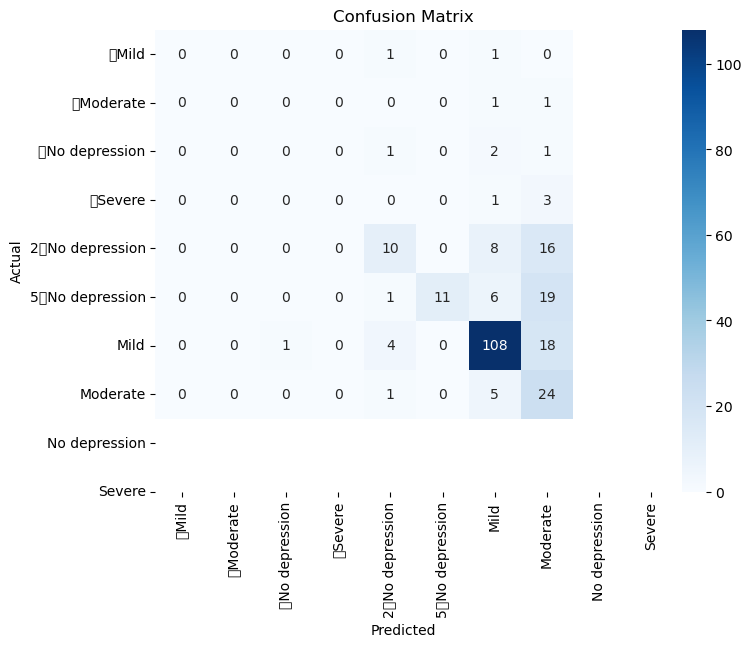

In [74]:
# Prediksi pada data test
y_pred = best_rf_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Eksperimen dengan Model Lain

GradientBoosting Accuracy: 0.6229508196721312
GradientBoosting Classification Report:
                precision    recall  f1-score   support

         	Mild       0.00      0.00      0.00         2
     	Moderate       0.00      0.00      0.00         2
	No depression       0.00      0.00      0.00         4
       	Severe       0.00      0.00      0.00         4
          Mild       0.83      0.29      0.43        34
      Moderate       1.00      0.30      0.46        37
 No depression       0.69      0.89      0.78       131
        Severe       0.34      0.50      0.41        30

      accuracy                           0.62       244
     macro avg       0.36      0.25      0.26       244
  weighted avg       0.68      0.62      0.60       244

LogisticRegression Accuracy: 0.5614754098360656
LogisticRegression Classification Report:
                precision    recall  f1-score   support

         	Mild       0.00      0.00      0.00         2
     	Moderate       0.00      0.00 

c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-pa

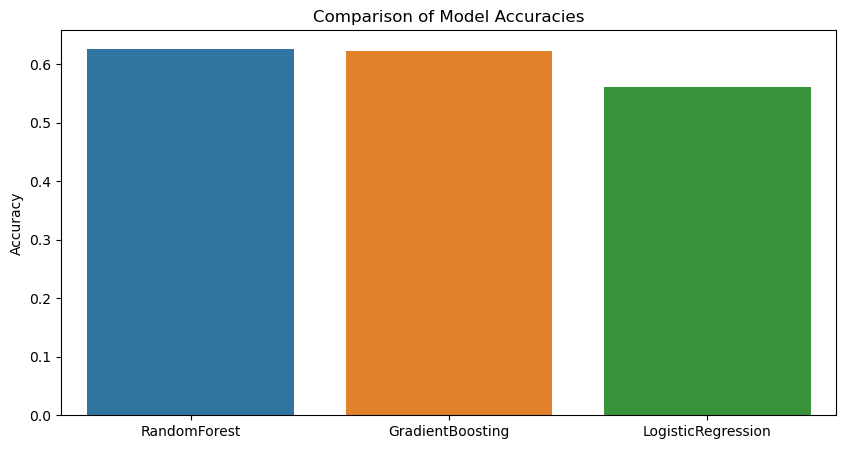

In [75]:
# Definisikan model GradientBoosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluasi model GradientBoosting
y_pred_gb = gb_model.predict(X_test)
print("GradientBoosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("GradientBoosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Definisikan model LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluasi model LogisticRegression
y_pred_lr = lr_model.predict(X_test)
print("LogisticRegression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LogisticRegression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Perbandingan akurasi
models = ['RandomForest', 'GradientBoosting', 'LogisticRegression']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_lr)]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

## Model Inference

In [76]:
# Contoh prediksi dengan data baru menggunakan model terbaik (RandomForest)
new_data = np.array([[1, 25, 1] + [0]*(len(features) - 3)])  # contoh data, sesuaikan dengan fitur yang ada
new_data = scaler.transform(new_data)
new_pred = best_rf_model.predict(new_data)
print("Predicted mental health status:", 'Depresi' if new_pred[0] == 1 else 'Tidak Depresi')


Predicted mental health status: Tidak Depresi


c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Kesimpulan:
Model RandomForest dengan tuning hyperparameter menunjukkan performa terbaik dalam memprediksi status kesehatan mental dibandingkan dengan model GradientBoosting dan LogisticRegression. Feature engineering tambahan juga membantu dalam meningkatkan akurasi model. Evaluasi lebih lanjut dengan data tambahan dan eksperimen dengan model lain dapat dilakukan untuk lebih meningkatkan performa.

Dengan perubahan ini, kita telah memperbaiki kode sesuai dengan kolom yang ada dalam dataset baru. Pastikan untuk memverifikasi kembali kolom yang ada dalam dataset sebelum menjalankan kode di atas.